In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("miroslavsabo/young-people-survey")

print("Path to dataset files:", path)

/Users/georgijhabner/Desktop/eda_survey/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/georgijhabner/.cache/kagglehub/datasets/miroslavsabo/young-people-survey/versions/2


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv(path + "/responses.csv")
print(df.shape)
df.head()


(1010, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [36]:
df['Smoking'] = df['Smoking'].apply(lambda x: 1 if x == 'current smoker' or x == 'former smoker' else (np.nan if x == np.nan else 0))
df['Alcohol'] = df['Alcohol'].apply(lambda x: 1 if x == 'drink a lot' else (np.nan if x == np.nan else 0))
df['Punctuality'] = df['Punctuality'].apply(lambda x: 1 if x == 'i am often early' else (np.nan if x == np.nan else 0))
df['Lying'] = df['Lying'].apply(lambda x: 1 if x != 'never' else (np.nan if x == np.nan else 0))
df['Internet usage'] = df['Internet usage'].map({'few hours a day': 1, 'less than an hour a day': 0, 'most of the day': 2, 'no time at all': 3})


In [37]:
# df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'female' else 0)
df['Left - right handed'] = df['Left - right handed'].apply(lambda x: 1 if x == 'left handed' else 0)
# df['Education'] = df['Education'].map({'currently a primary school pupil': 1, 'primary school': 2, 'secondary school': 3, 'college/bachelor degree': 4, 'masters degree': 5, 'doctorate degree': 6})
df['Only child'] = df['Only child'].apply(lambda x: 1 if x == 'yes' else 0)
# df['Village - town'] = df['Village - town'].apply(lambda x: 1 if x == 'village' else 0)
# df['House - block of flats'] = df['House - block of flats'].apply(lambda x: 1 if x == 'house/bungalow' else 0)

In [38]:
# dividing the data into different categories

music = df.iloc[:,1:19]
films = df.iloc[:,19:31]
hobbies = df.iloc[:,31:46]
phobias = df.iloc[:,46:63]
health = df.iloc[:,63:76]
personality = df.iloc[:,76:133]
spending = df.iloc[:,133:140]
demographics = df.iloc[:,140:]


array([[<Axes: title={'center': 'Slow songs or fast songs'}>,
        <Axes: title={'center': 'Dance'}>,
        <Axes: title={'center': 'Folk'}>,
        <Axes: title={'center': 'Country'}>],
       [<Axes: title={'center': 'Classical music'}>,
        <Axes: title={'center': 'Musical'}>,
        <Axes: title={'center': 'Pop'}>,
        <Axes: title={'center': 'Rock'}>],
       [<Axes: title={'center': 'Metal or Hardrock'}>,
        <Axes: title={'center': 'Punk'}>,
        <Axes: title={'center': 'Hiphop, Rap'}>,
        <Axes: title={'center': 'Reggae, Ska'}>],
       [<Axes: title={'center': 'Swing, Jazz'}>,
        <Axes: title={'center': 'Rock n roll'}>,
        <Axes: title={'center': 'Alternative'}>,
        <Axes: title={'center': 'Latino'}>],
       [<Axes: title={'center': 'Techno, Trance'}>,
        <Axes: title={'center': 'Opera'}>, <Axes: >, <Axes: >]],
      dtype=object)

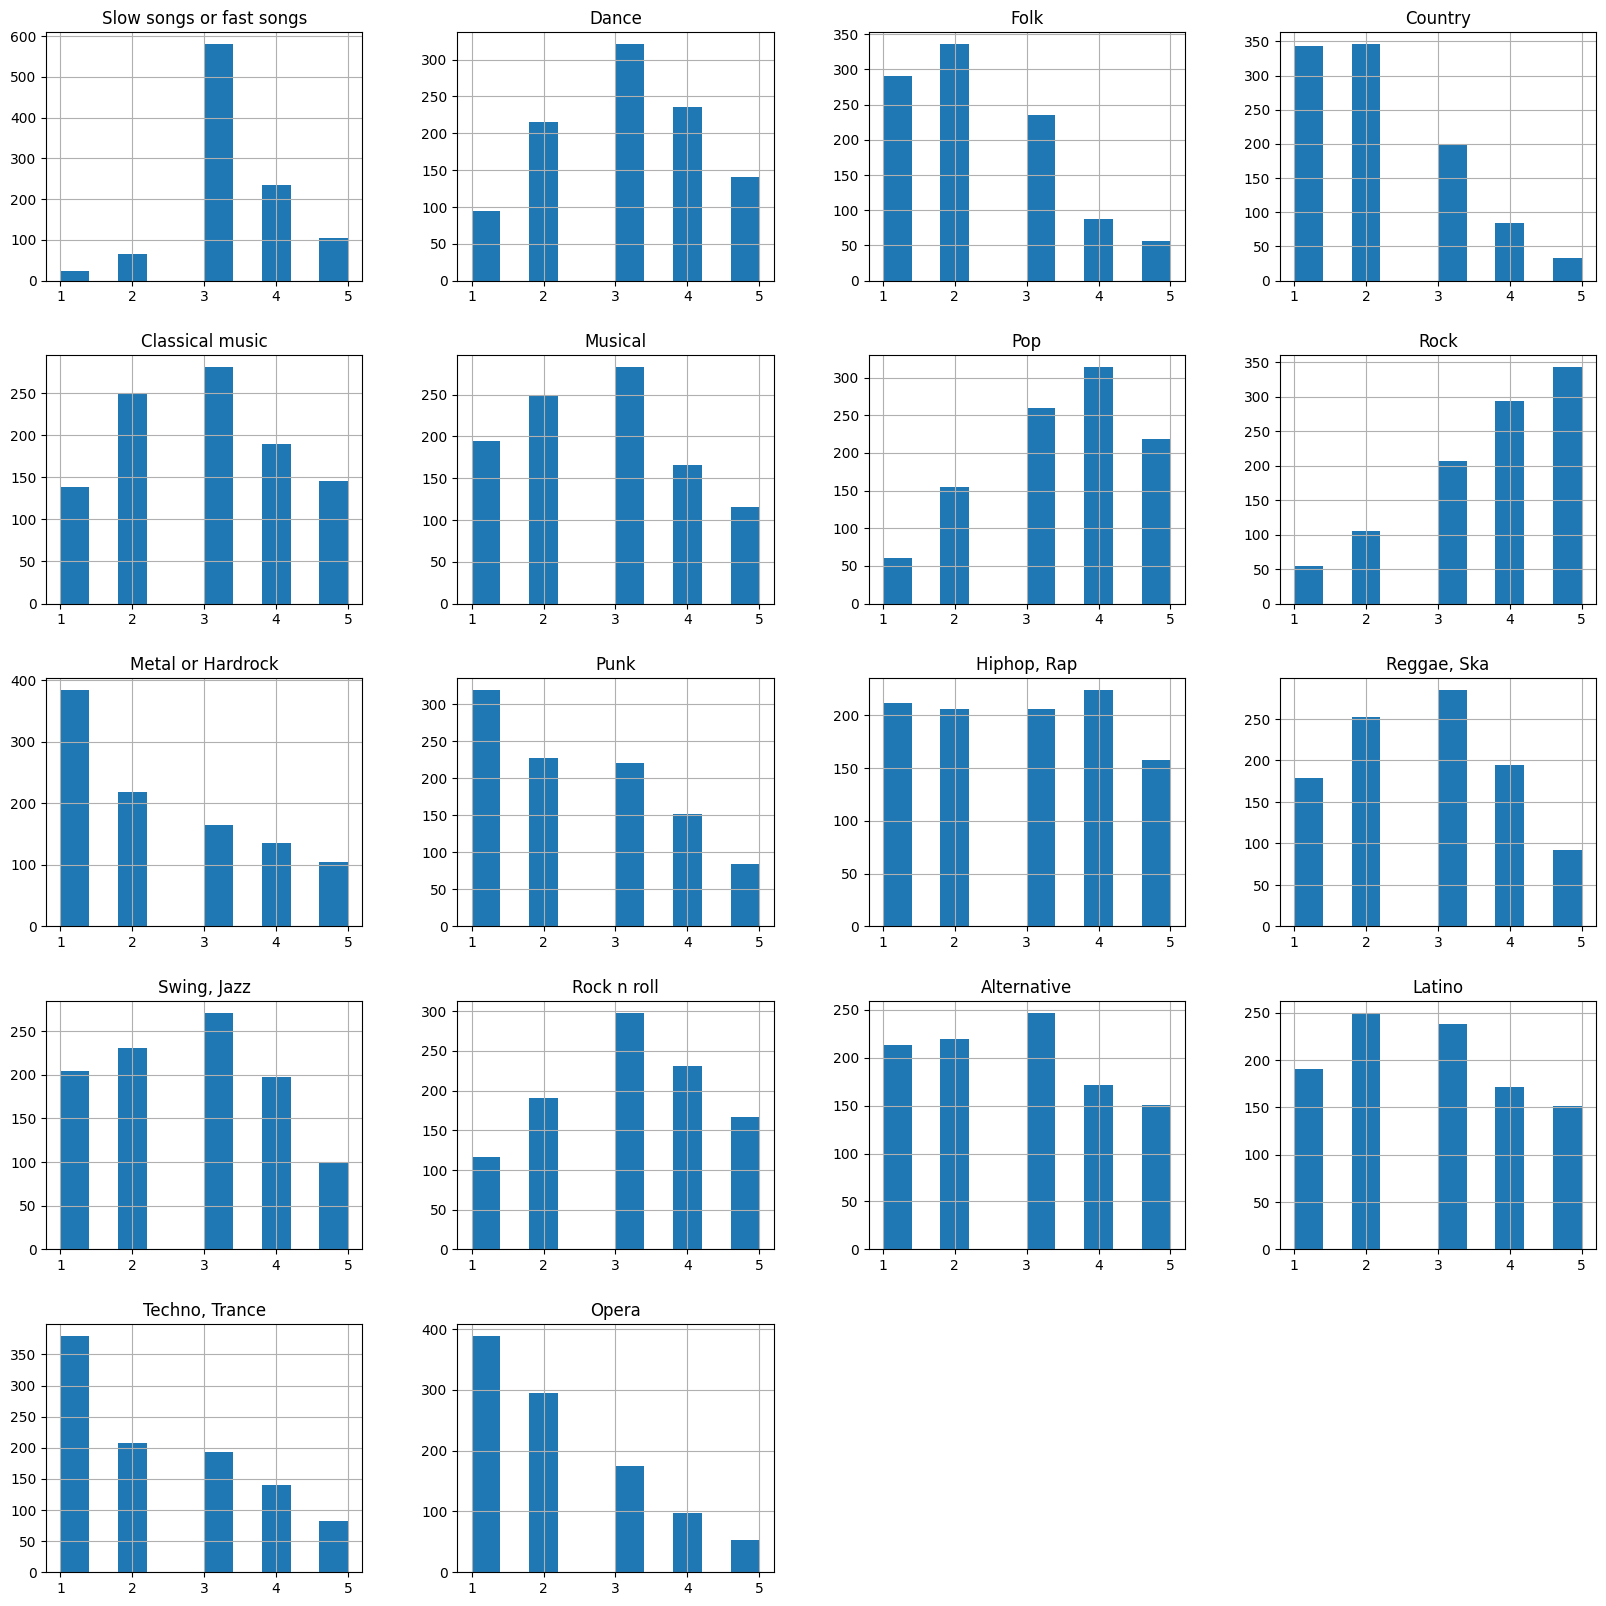

In [39]:
music.hist(figsize=(20,20))

In [40]:
music.isna().sum()

Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
Classical music             7
Musical                     2
Pop                         3
Rock                        6
Metal or Hardrock           3
Punk                        8
Hiphop, Rap                 4
Reggae, Ska                 7
Swing, Jazz                 6
Rock n roll                 7
Alternative                 7
Latino                      8
Techno, Trance              7
Opera                       1
dtype: int64

In [41]:
music = music.dropna()

In [42]:
most_liked_music = ""

dict_of_fives = {col: 0 for col in music.columns}
dict_of_ones = {col: 0 for col in music.columns}

for i in music:
    for j in music[i]:
        if j == 5:
            dict_of_fives[i]+=1
        elif j == 1:
            dict_of_ones[i]+=1
            
most_liked_music = max(dict_of_fives, key=dict_of_fives.get)
print(f'Most liked music: {most_liked_music}')

least_liked_music = min(dict_of_ones, key=dict_of_ones.get)
print(f'Least liked music: {least_liked_music}')
    

Most liked music: Rock
Least liked music: Slow songs or fast songs


In [43]:
# converting most liked music to a pd
most_liked_music = pd.DataFrame.from_dict(dict_of_fives,orient='index')
most_liked_music = most_liked_music.reset_index()
most_liked_music.columns = ['Rating','Count']
print(most_liked_music)

# converting least liked music to a pd
least_liked_music = pd.DataFrame.from_dict(dict_of_ones,orient='index')
least_liked_music = least_liked_music.reset_index()
least_liked_music.columns = ['Rating','Count']
least_liked_music

                      Rating  Count
0   Slow songs or fast songs     90
1                      Dance    127
2                       Folk     50
3                    Country     31
4            Classical music    137
5                    Musical    111
6                        Pop    206
7                       Rock    316
8          Metal or Hardrock     97
9                       Punk     75
10               Hiphop, Rap    140
11               Reggae, Ska     83
12               Swing, Jazz     94
13               Rock n roll    155
14               Alternative    143
15                    Latino    142
16            Techno, Trance     71
17                     Opera     51


,Rating,Count
0,Slow songs or fast songs,20
1,Dance,90
2,Folk,273
3,Country,316
4,Classical music,129
5,Musical,183
6,Pop,57
7,Rock,46
8,Metal or Hardrock,357
9,Punk,297


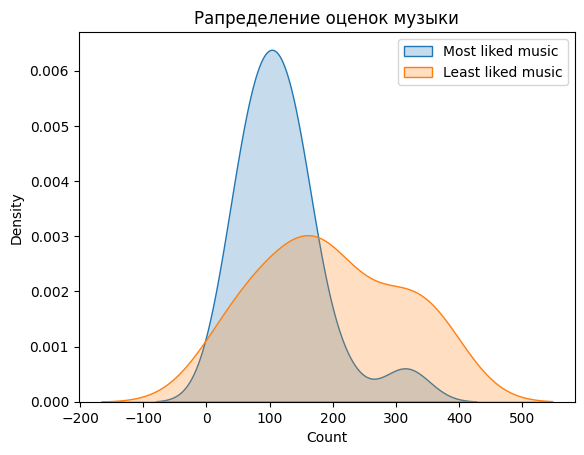

In [44]:
sns.kdeplot(data=most_liked_music, x='Count', fill=True)
sns.kdeplot(data=least_liked_music, x='Count', fill=True)
plt.title('Рапределение оценок музыки')
plt.legend(['Most liked music', 'Least liked music'])

In [45]:
demographics.describe()

,Age,Height,Weight,Number of siblings,Left - right handed,Only child
count,1003.000000,990.000000,990.000000,1004.000000,1010.000000,1010.000000
mean,20.433699,173.514141,66.405051,1.297809,0.100000,0.251485
std,2.828840,10.024505,13.839561,1.013348,0.300149,0.434082
min,15.000000,62.000000,41.000000,0.000000,0.000000,0.000000
25%,19.000000,167.000000,55.000000,1.000000,0.000000,0.000000
50%,20.000000,173.000000,64.000000,1.000000,0.000000,0.000000
75%,22.000000,180.000000,75.000000,2.000000,0.000000,1.000000
max,30.000000,203.000000,165.000000,10.000000,1.000000,1.000000


In [46]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1003 non-null   float64
 1   Height                  990 non-null    float64
 2   Weight                  990 non-null    float64
 3   Number of siblings      1004 non-null   float64
 4   Gender                  1004 non-null   object 
 5   Left - right handed     1010 non-null   int64  
 6   Education               1009 non-null   object 
 7   Only child              1010 non-null   int64  
 8   Village - town          1006 non-null   object 
 9   House - block of flats  1006 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 79.0+ KB


In [47]:
demographics['Age'] = demographics['Age'].fillna(demographics['Age'].median())
demographics['Height'] = demographics['Height'].fillna(demographics['Height'].median())
demographics['Weight'] = demographics['Weight'].fillna(demographics['Weight'].median())
demographics['Number of siblings'].dropna(inplace=True)

demographics['Gender'].dropna(inplace=True)
demographics['Village - town'].fillna(demographics['Village - town'].mode()[0], inplace=True)
demographics['House - block of flats'].fillna(demographics['House - block of flats'].mode()[0], inplace=True)
demographics['Education'].fillna(demographics['Education'].mode()[0], inplace=True)
demographics['Only child'].dropna(inplace=True)

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_51920/3377719812.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demographics['Village - town'].fillna(demographics['Village - town'].mode()[0], inplace=True)
/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_51920/3377719812.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedia

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Number of siblings'}>],
       [<Axes: title={'center': 'Left - right handed'}>,
        <Axes: title={'center': 'Only child'}>]], dtype=object)

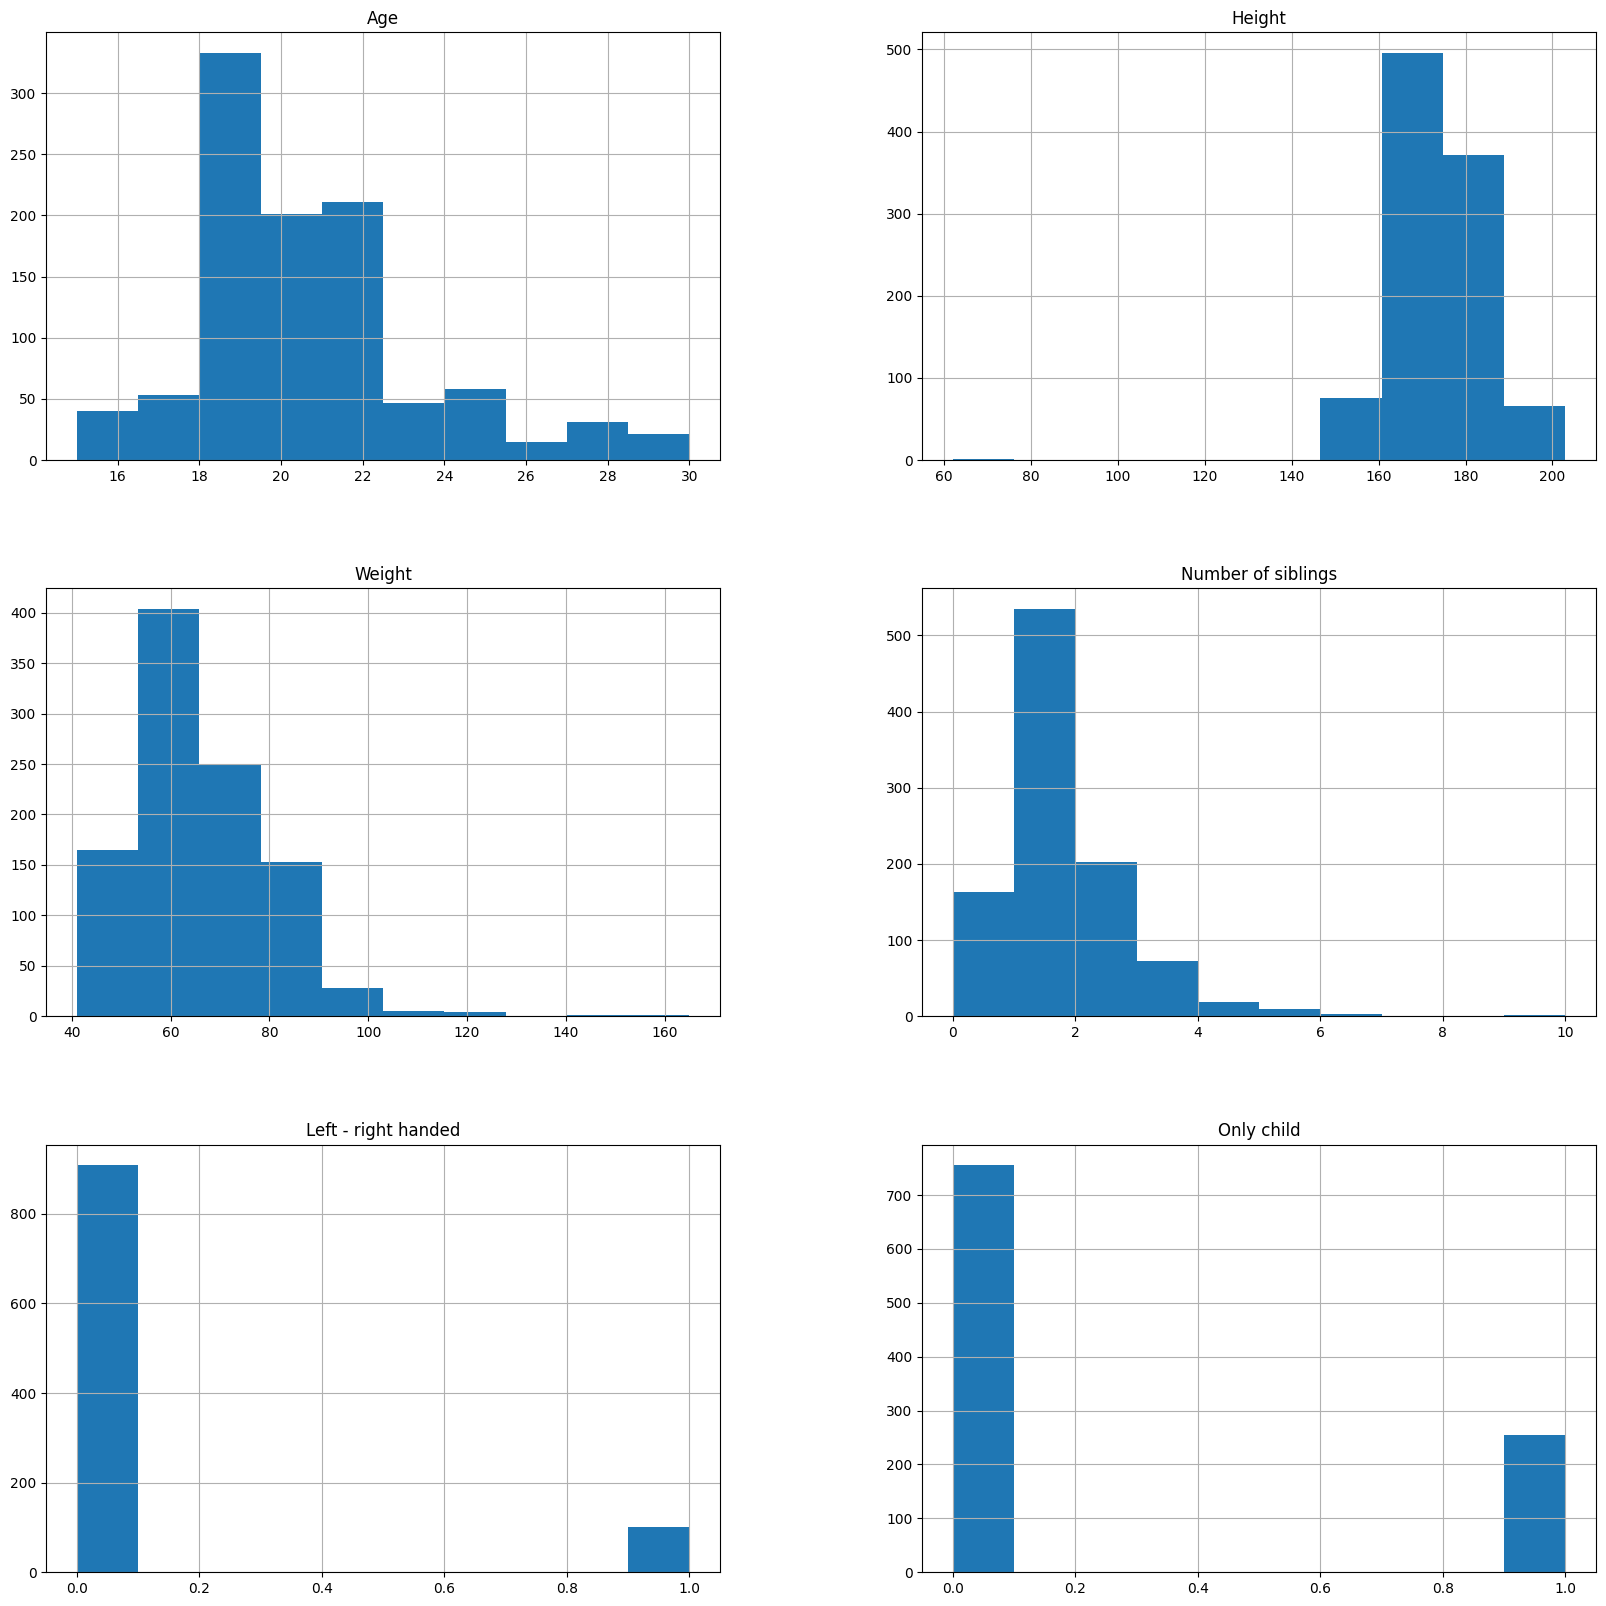

In [48]:
demographics.hist(figsize=(20,20))

In [69]:
# get the number of columns where Number of siblings is more than 1 and Only child is Yes
demographics[(demographics['Number of siblings'] > 1) & (demographics['Only child'] == 1)].shape[0]

25

<Axes: xlabel='Number of siblings', ylabel='Density'>

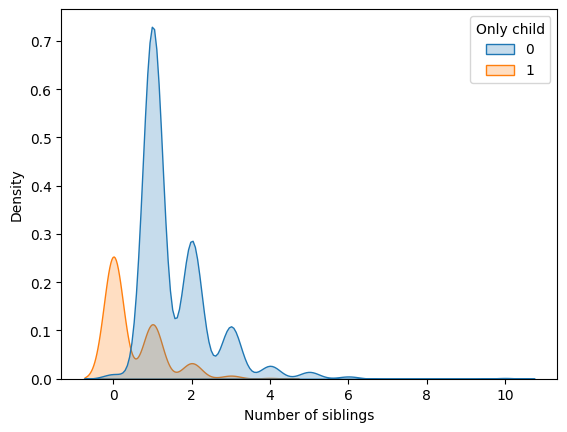

In [50]:
# plt.plot(demographics['Age'].value_counts().sort_index())
sns.kdeplot(data=demographics, x='Number of siblings', hue='Only child', fill=True)

In [51]:
# getting people that say that they have siblings but they are the only child and they don't lie

liers = df[['Lying', 'Number of siblings', 'Only child']]
liers['Lie about siblings'] = (liers['Number of siblings'] > 1) & (liers['Only child'] == 1)
liers['Lie about siblings'] = liers['Lie about siblings'].apply(lambda x: 1 if x else 0)

liers[(liers['Lie about siblings'] == 1) & (liers['Lying'] == 0)]

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_51920/2041343163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liers['Lie about siblings'] = (liers['Number of siblings'] > 1) & (liers['Only child'] == 1)
/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_51920/2041343163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liers['Lie about siblings'] = liers['Lie about siblings'].apply(lambda x: 1 if x else 0)


,Lying,Number of siblings,Only child,Lie about siblings
253,0,2.0,1,1
469,0,2.0,1,1


Lie about siblings
0    985
1     25
Name: count, dtype: int64

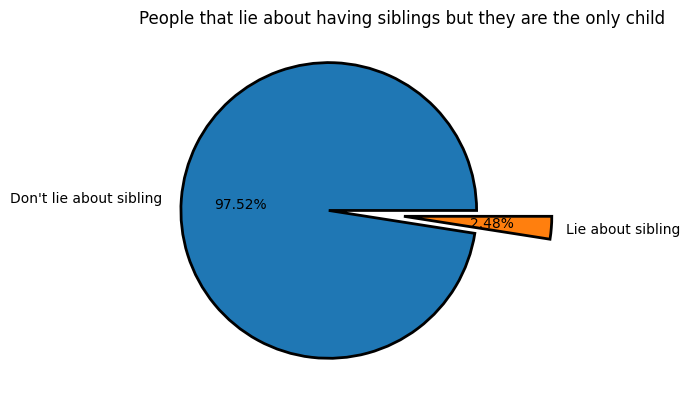

In [63]:
explode = (0.5, 0.01)
plt.pie(liers['Lie about siblings'].value_counts(), explode=explode, labels=['Don\'t lie about sibling ', 'Lie about sibling'], autopct='%1.2f%%', wedgeprops={"edgecolor": "black", 'linewidth': 2, 'antialiased': True})
plt.title('People that lie about having siblings but they are the only child')
liers['Lie about siblings'].value_counts()

Text(0.5, 1.0, 'Education level by age')

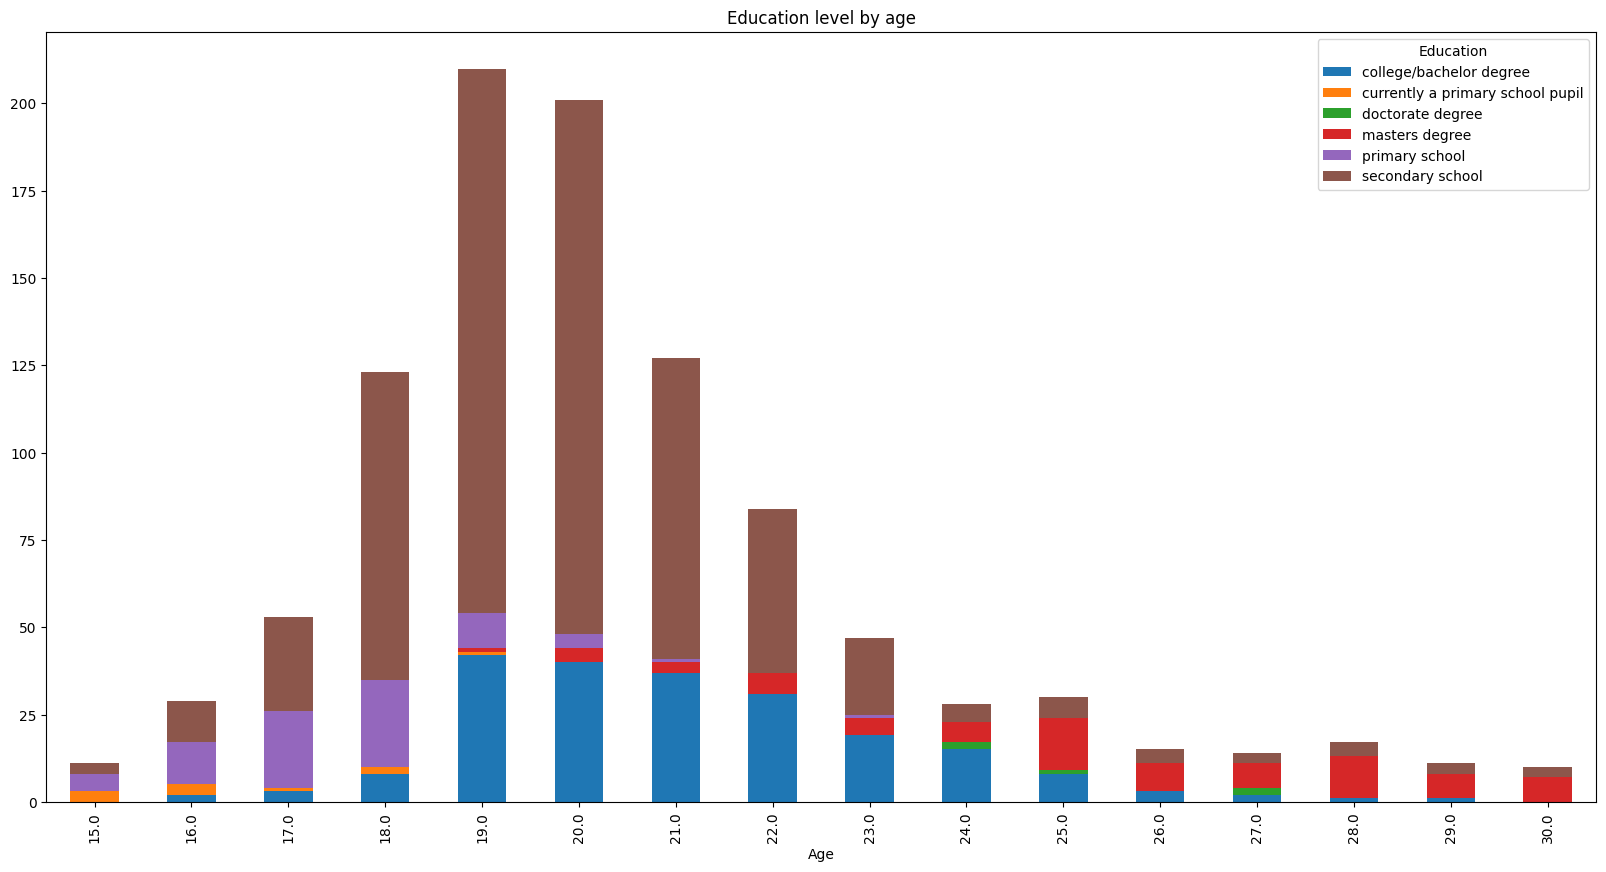

In [75]:
demographics.groupby('Age')['Education'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(20,10))
plt.title('Education level by age')

Text(0.5, 1.0, 'House - block of flats by age and education')

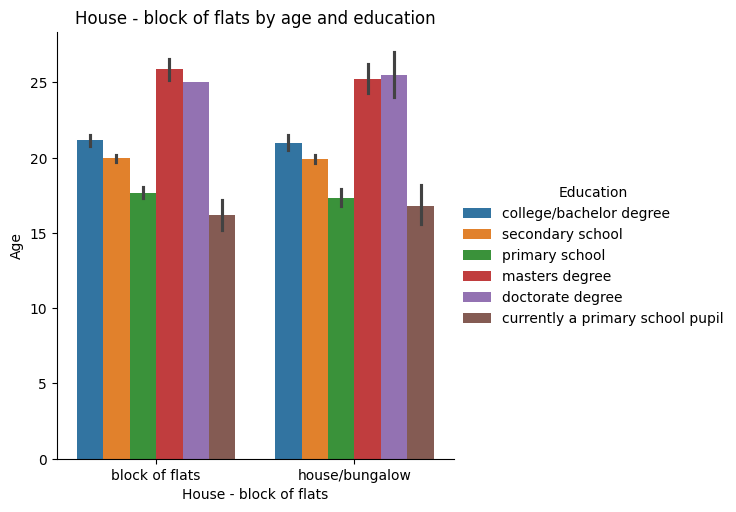

In [80]:
sns.catplot(data=demographics, x='House - block of flats', y='Age', hue='Education', kind='bar')
plt.title('House - block of flats by age and education')


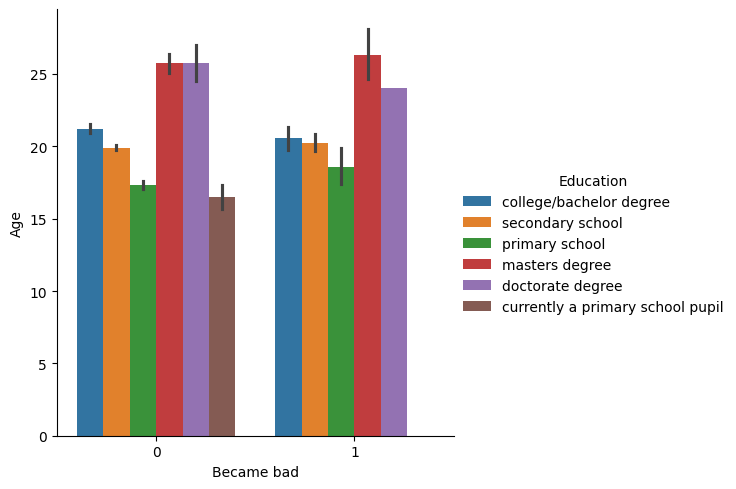

In [105]:
bad_habitats_edu = df[['Smoking', 'Education', 'Age', 'Alcohol']]

bad_habitats_edu = bad_habitats_edu.dropna()
bad_habitats_edu['Became bad'] = bad_habitats_edu['Smoking'] * bad_habitats_edu['Alcohol']

sns.catplot(data=bad_habitats_edu, x='Became bad', y='Age', hue='Education', kind='bar');


<Axes: >

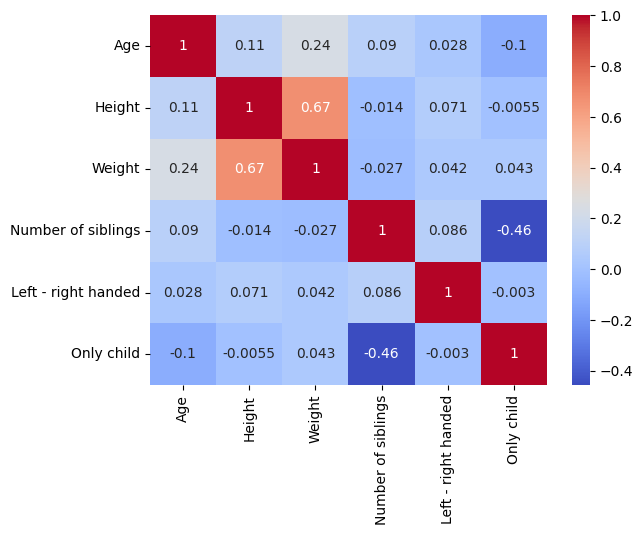

In [85]:
demographics_corr_cols = np.where(demographics.dtypes is not object)[0]

sns.heatmap(demographics.iloc[:,demographics_corr_cols].corr(), annot=True, cmap='coolwarm')